In [16]:
# Install yfinance.
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
# Import dependencies.
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import ParameterGrid
from sklearn import metrics
from datetime import datetime


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [18]:
# Setting the start date
today = datetime.now()
start_date = datetime(today.year-1 ,today.month ,today.day)
print(start_date)

2022-01-28 00:00:00


In [19]:
# Tickers for the companies used for data analysis
ticker_dist = {"Google": "GOOGL",
              "Microsoft":"MSFT",
              "Tesla":"TSLA",
              "Amazon":"AMZN",
              "Netflix":"NFLX",
              "Apple":"AAPL",
              "Facebook":"META"}


In [20]:
# Converting the data to csv.
for ticker in ticker_dist:
    filepath = ticker +".csv"
    globals()[ticker] = yf.download(ticker_dist[ticker], start=start_date, end=today)
    globals()[ticker].to_csv(filepath)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [21]:
# Reading the data from csv.
for ticker in ticker_dist:
    filepath = ticker +".csv"
    globals()[ticker] = pd.read_csv(filepath, index_col=0)
    ticker = globals()[ticker]
    

In [22]:
# all ticker name list for labels graph comparision.
labels=[]
for ticker in ticker_dist:
    labels.append(ticker)


In [23]:
# Displaying the labels.
labels

['Google', 'Microsoft', 'Tesla', 'Amazon', 'Netflix', 'Apple', 'Facebook']

In [24]:
# The ticker list for 7 companies.
ticker_list = ["GOOGL","MSFT","TSLA","META","AAPL","AMZN","NFLX"]

In [25]:
# Loading the data by grouping it by 'ticker'.
df = yf.download(ticker_list, start=start_date, end=today,group_by="ticker") 

[*********************100%***********************]  7 of 7 completed


In [26]:
# Converting the data to csv file.
filepath= "merged_df.csv"
df.to_csv(filepath)

In [27]:
# Display the dataframe.
df.head()

AMZN                                      \
                                 Open        High         Low       Close   
Date                                                                        
2022-01-28 00:00:00-05:00  140.860504  143.998001  137.929504  143.977997   
2022-01-31 00:00:00-05:00  144.750000  150.360504  144.300507  149.573502   
2022-02-01 00:00:00-05:00  150.000000  151.707993  147.627502  151.193497   
2022-02-02 00:00:00-05:00  155.050507  155.074997  148.863495  150.612503   
2022-02-03 00:00:00-05:00  141.737503  144.247498  138.332993  138.845505   

                                                       GOOGL              \
                            Adj Close     Volume        Open        High   
Date                                                                       
2022-01-28 00:00:00-05:00  143.977997   74392000  129.658997  133.356506   
2022-01-31 00:00:00-05:00  149.573502   78308000  134.162003  135.473007   
2022-02-01 00:00:00-05:00  151.193497   59220000  137.594498  137.792999   
2022-02-02 00:00:00-05:00  150.612503   87330000  151.250000  151.546494   
2022-02-03 00:00:00-05:00  138.845505  225532000  145.705505  149.675003   

                                                   ...        AAPL  \
                                  Low       Close  ...         Low   
Date                                               ...               
2022-01-28 00:00:00-05:00  128.485001  133.350998  ...  162.800003   
2022-01-31 00:00:00-05:00  132.209503  135.303497  ...  169.509995   
2022-02-01 00:00:00-05:00  134.368500  137.643997  ...  172.309998   
2022-02-02 00:00:00-05:00  145.522507  148.000000  ...  173.330002   
2022-02-03 00:00:00-05:00  142.665497  143.089996  ...  172.119995   

                                                                    MSFT  \
                                Close   Adj Close     Volume        Open   
Date                                                                       
2022-01-28 00:00:00-05:00  170.330002  169.347153  179935700  300.230011   
2022-01-31 00:00:00-05:00  174.779999  173.771469  115541600  308.950012   
2022-02-01 00:00:00-05:00  174.610001  173.602448   86213900  310.410004   
2022-02-02 00:00:00-05:00  175.839996  174.825348   84914300  309.630005   
2022-02-03 00:00:00-05:00  172.899994  171.902313   89418100  309.489990   

                                                                           \
                                 High         Low       Close   Adj Close   
Date                                                                        
2022-01-28 00:00:00-05:00  308.480011  294.450012  308.260010  305.398376   
2022-01-31 00:00:00-05:00  312.380005  306.369995  310.980011  308.093109   
2022-02-01 00:00:00-05:00  310.630005  305.130005  308.760010  305.893738   
2022-02-02 00:00:00-05:00  315.119995  308.880005  313.459991  310.550079   
2022-02-03 00:00:00-05:00  311.230011  299.959991  301.250000  298.453430   

                                     
                             Volume  
Date                                 
2022-01-28 00:00:00-05:00  49743700  
2022-01-31 00:00:00-05:00  46444500  
2022-02-01 00:00:00-05:00  40950400  
2022-02-02 00:00:00-05:00  36636000  
2022-02-03 00:00:00-05:00  43730000  

[5 rows x 42 columns]

In [28]:
# Displaying information for merged_df
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-01-28 00:00:00-05:00 to 2023-01-27 00:00:00-05:00
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (AMZN, Open)        251 non-null    float64
 1   (AMZN, High)        251 non-null    float64
 2   (AMZN, Low)         251 non-null    float64
 3   (AMZN, Close)       251 non-null    float64
 4   (AMZN, Adj Close)   251 non-null    float64
 5   (AMZN, Volume)      251 non-null    int64  
 6   (GOOGL, Open)       251 non-null    float64
 7   (GOOGL, High)       251 non-null    float64
 8   (GOOGL, Low)        251 non-null    float64
 9   (GOOGL, Close)      251 non-null    float64
 10  (GOOGL, Adj Close)  251 non-null    float64
 11  (GOOGL, Volume)     251 non-null    int64  
 12  (TSLA, Open)        251 non-null    float64
 13  (TSLA, High)        251 non-null    float64
 14  (TSLA, Low)         251 non-null    float64
 15  (TSLA, C

In [29]:
# Loading the data from csv files.
google_df = pd.read_csv("Google.csv")
Amazon_df = pd.read_csv("Amazon.csv")
Facebook_df = pd.read_csv("Facebook.csv")
Apple_df = pd.read_csv("Apple.csv")
Microsoft_df = pd.read_csv("Microsoft.csv")
Netflix_df = pd.read_csv("Netflix.csv")
Tesla_df = pd.read_csv("Tesla.csv")

In [30]:
# Checking the information for google_df
Amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [31]:
# Converting the date column to date type.
Amazon_df['Date'] = pd.to_datetime(Amazon_df['Date'], utc=True)


In [32]:
# Checking data types to confirm the change.
Amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       251 non-null    datetime64[ns, UTC]
 1   Open       251 non-null    float64            
 2   High       251 non-null    float64            
 3   Low        251 non-null    float64            
 4   Close      251 non-null    float64            
 5   Adj Close  251 non-null    float64            
 6   Volume     251 non-null    int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 13.9 KB


In [33]:
Amazon_df = Amazon_df.set_index('Date')
Amazon_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-28 05:00:00+00:00,140.860504,143.998001,137.929504,143.977997,143.977997,74392000
2022-01-31 05:00:00+00:00,144.750000,150.360504,144.300507,149.573502,149.573502,78308000
2022-02-01 05:00:00+00:00,150.000000,151.707993,147.627502,151.193497,151.193497,59220000
2022-02-02 05:00:00+00:00,155.050507,155.074997,148.863495,150.612503,150.612503,87330000
2022-02-03 05:00:00+00:00,141.737503,144.247498,138.332993,138.845505,138.845505,225532000


In [34]:
Amazon_df['High_Low_per'] = (Amazon_df['High'] - Amazon_df['Low']) / Amazon_df['Low']*100


In [35]:
Amazon_df['Per_change'] = (Amazon_df['Open'] - Amazon_df['Close']) / Amazon_df['Close']*100

In [36]:
Amazon_df = Amazon_df[['Adj Close','High_Low_per','Per_change','Volume']]

In [37]:
import math

In [38]:
forecast_ceil = int(math.ceil(0.001*len(google_df)))

In [39]:
label_col = 'Adj Close'

In [40]:
Amazon_df['label'] = Amazon_df[label_col].shift(-forecast_ceil)

In [41]:
from sklearn.svm import SVR 
import sklearn.preprocessing as preprocessing

import matplotlib.pyplot as plt
from matplotlib import style

In [44]:
#feaures X, labels Y
X = np.array(Amazon_df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_ceil:]
X_lately = X[-forecast_ceil:] #no y value

In [45]:
Amazon_df.dropna(inplace=True)

In [46]:
y = np.array(Amazon_df['label'])

In [47]:
len(X)

250

In [48]:
len(y)

250

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [50]:
clf = SVR(kernel='rbf')

In [51]:
clf.fit(X_train, y_train) #train

SVR()

In [52]:
accuracy = clf.score(X_test, y_test) #test Accuracy squared error for linreg


In [53]:
 
print(accuracy) #directionally accurate

0.731827465737173


In [54]:
forecast_set = clf.predict(X_lately) #pass a single value or array

In [55]:
print(forecast_set, accuracy) # stockprices next 30 days

[101.63628453] 0.731827465737173


In [56]:
Amazon_df['Forecast'] = np.nan

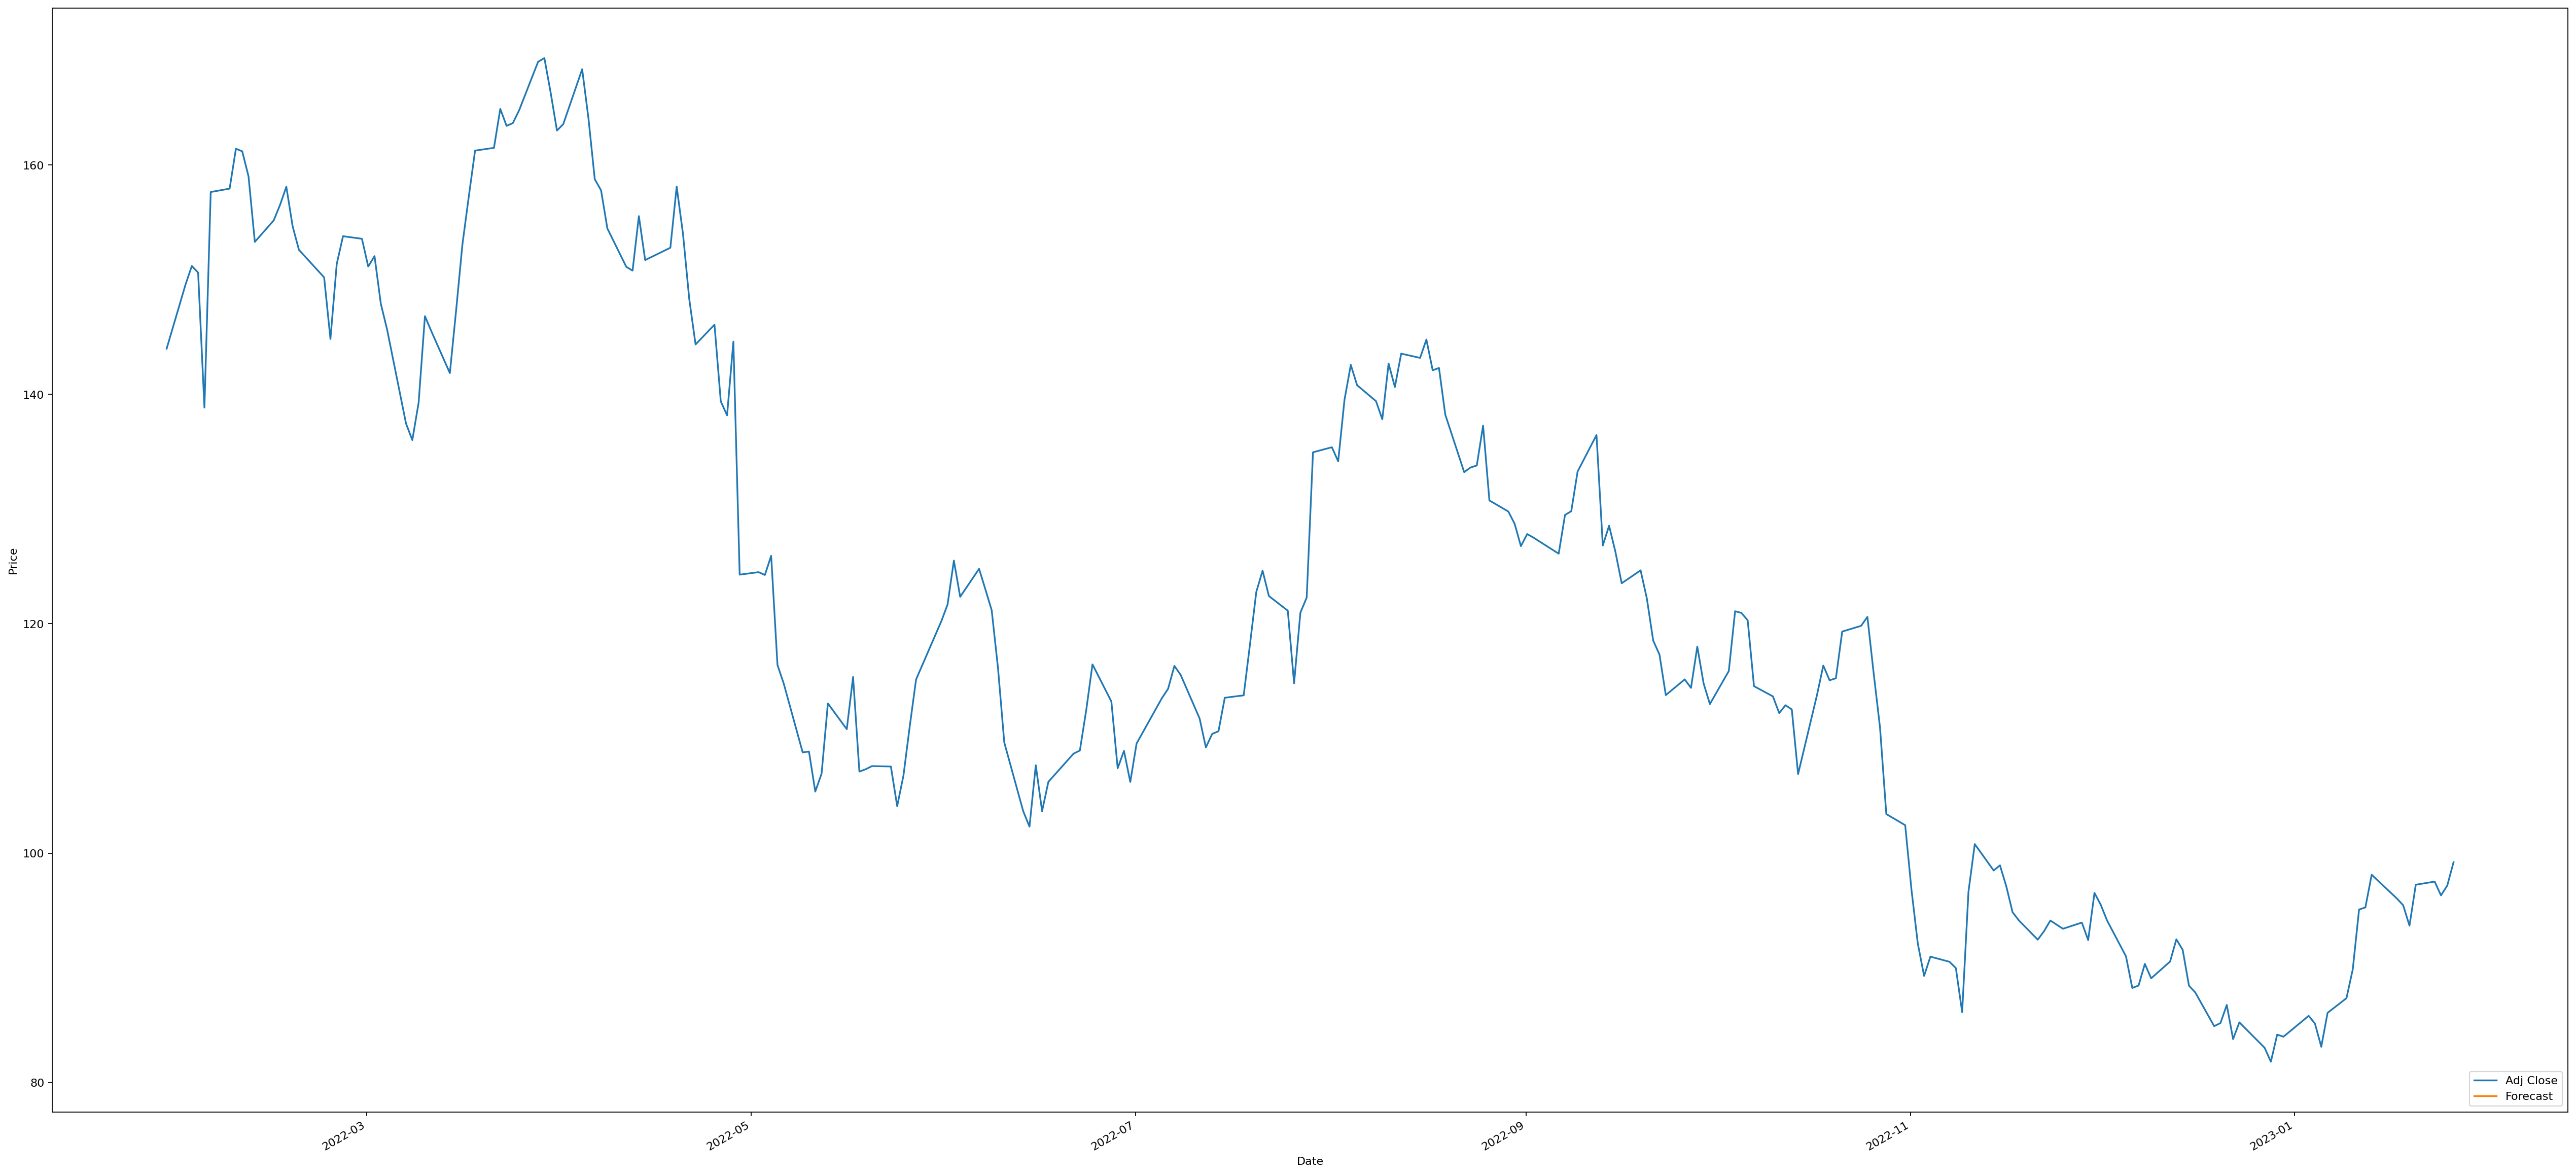

In [57]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(40, 20), dpi=160, facecolor='w', edgecolor='k')
Amazon_df['Adj Close'].plot()
Amazon_df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()